# Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
from IPython.display import display

warnings.filterwarnings('ignore')
%matplotlib inline

style.use('seaborn')

pd.options.display.max_columns = None

In [2]:
data_types = {'MachineIdentifier': 'object',
              'ProductName': 'category',
              'EngineVersion': 'category',
              'AppVersion': 'category',
              'AvSigVersion': 'category',
              'IsBeta': 'float32',
              'RtpStateBitfield': 'float32',
              'IsSxsPassiveMode': 'float32',
              'DefaultBrowsersIdentifier': 'float32',
              'AVProductStatesIdentifier': 'float32',
              'AVProductsInstalled': 'float32',
              'AVProductsEnabled': 'float32',
              'HasTpm': 'float32',
              'CountryIdentifier': 'float32',
              'CityIdentifier': 'float32',
              'OrganizationIdentifier': 'float32',
              'GeoNameIdentifier': 'float32',
              'LocaleEnglishNameIdentifier': 'float32',
              'Platform': 'category',
              'Processor': 'category',
              'OsVer': 'category',
              'OsBuild': 'float32',
              'OsSuite': 'float32',
              'OsPlatformSubRelease': 'category',
              'OsBuildLab': 'category',
              'SkuEdition': 'category',
              'IsProtected': 'float32',
              'AutoSampleOptIn': 'float32',
              'PuaMode': 'category',
              'SMode': 'float32',
              'IeVerIdentifier': 'float32',
              'SmartScreen': 'category',
              'Firewall': 'float32',
              'UacLuaenable': 'float32',
              'Census_MDC2FormFactor': 'category',
              'Census_DeviceFamily': 'category',
              'Census_OEMNameIdentifier': 'float32',
              'Census_OEMModelIdentifier': 'float32',
              'Census_ProcessorCoreCount': 'float32',
              'Census_ProcessorManufacturerIdentifier': 'float32',
              'Census_ProcessorModelIdentifier': 'float32',
              'Census_ProcessorClass': 'category',
              'Census_PrimaryDiskTotalCapacity': 'float32',
              'Census_PrimaryDiskTypeName': 'category',
              'Census_SystemVolumeTotalCapacity': 'float32',
              'Census_HasOpticalDiskDrive': 'float32',
              'Census_TotalPhysicalRAM': 'float32',
              'Census_ChassisTypeName': 'category',
              'Census_InternalPrimaryDiagonalDisplaySizeInInches': 'float32',
              'Census_InternalPrimaryDisplayResolutionHorizontal': 'float32',
              'Census_InternalPrimaryDisplayResolutionVertical': 'float32',
              'Census_PowerPlatformRoleName': 'category',
              'Census_InternalBatteryType': 'category',
              'Census_InternalBatteryNumberOfCharges': 'float32',
              'Census_OSVersion': 'category',
              'Census_OSArchitecture': 'category',
              'Census_OSBranch': 'category',
              'Census_OSBuildNumber': 'float32',
              'Census_OSBuildRevision': 'float32',
              'Census_OSEdition': 'category',
              'Census_OSSkuName': 'category',
              'Census_OSInstallTypeName': 'category',
              'Census_OSInstallLanguageIdentifier': 'float32',
              'Census_OSUILocaleIdentifier': 'float32',
              'Census_OSWUAutoUpdateOptionsName': 'category',
              'Census_IsPortableOperatingSystem': 'float32',
              'Census_GenuineStateName': 'category',
              'Census_ActivationChannel': 'category',
              'Census_IsFlightingInternal': 'float32',
              'Census_IsFlightsDisabled': 'float32',
              'Census_FlightRing': 'category',
              'Census_ThresholdOptIn': 'float32',
              'Census_FirmwareManufacturerIdentifier': 'float32',
              'Census_FirmwareVersionIdentifier': 'float32',
              'Census_IsSecureBootEnabled': 'float32',
              'Census_IsWIMBootEnabled': 'float32',
              'Census_IsVirtualDevice': 'float32',
              'Census_IsTouchEnabled': 'float32',
              'Census_IsPenCapable': 'float32',
              'Census_IsAlwaysOnAlwaysConnectedCapable': 'float32',
              'Wdft_IsGamer': 'float32',
              'Wdft_RegionIdentifier': 'float32',
              'HasDetections': 'float32'}

In [3]:
df = pd.read_csv('../data/train.csv', dtype=data_types)

In [4]:
boo = ['IsBeta', 'IsSxsPassiveMode', 'HasTpm', 'AutoSampleOptIn', 'Census_HasOpticalDiskDrive',
       'Census_IsPortableOperatingSystem', 'Census_IsFlightsDisabled', 'Census_IsSecureBootEnabled',
       'Census_IsVirtualDevice', 'Census_IsTouchEnabled', 'Census_IsPenCapable', 
       'Census_IsAlwaysOnAlwaysConnectedCapable', 'Wdft_IsGamer', 'IsProtected', 'SMode',
       'Firewall', 'HasDetections']

for att in boo:
    df[att] = df[att].astype('bool')

In [5]:
uns = ['CountryIdentifier', 'LocaleEnglishNameIdentifier',
       'OsBuild', 'OsSuite', 'Census_OSBuildNumber',
       'Census_OSBuildRevision', 'Census_OSUILocaleIdentifier']

for att in uns:
    df[att] = pd.to_numeric(df[att], downcast='unsigned')

## Deal with NaNs

### Drop columns with a lot of NaNs Programatically

In [6]:
def get_cols_with_many_nans(df, identifier, percentage=0.2):
    """
    Find columns within a dataframe that contain less than x% non-NaN values.
    params
    df (dataframe): A pandas dataframe
    identifier (string): Any column with no NaNs, used to compute the threshold (not actually altered)
    percentage (float): The lowest amount of non-NaN values you're willing to tolerate.
    returns
    (list): Columns that don't meet the minimum number of non-null values.
    """
    result = []
    total_rows = df[identifier].count()
    threshold = int(total_rows * percentage)
    for (columnName, _) in df.iteritems():
        if df[columnName].isna().sum() > threshold:
            result.append(columnName)
    return result

def drop_cols_with_many_nans(df, cols_to_drop):
    df.drop(cols_to_drop, axis=1, inplace=True)

to_drop = get_cols_with_many_nans(df, 'MachineIdentifier')
to_drop

['DefaultBrowsersIdentifier',
 'OrganizationIdentifier',
 'PuaMode',
 'SmartScreen',
 'Census_ProcessorClass',
 'Census_InternalBatteryType',
 'Census_IsFlightingInternal',
 'Census_ThresholdOptIn',
 'Census_IsWIMBootEnabled']

In [7]:
df.isna().sum()

MachineIdentifier                                0
ProductName                                      0
EngineVersion                                    0
AppVersion                                       0
AvSigVersion                                     0
IsBeta                                           0
RtpStateBitfield                             32318
IsSxsPassiveMode                                 0
DefaultBrowsersIdentifier                  8488045
AVProductStatesIdentifier                    36221
AVProductsInstalled                          36221
AVProductsEnabled                            36221
HasTpm                                           0
CountryIdentifier                                0
CityIdentifier                              325409
OrganizationIdentifier                     2751518
GeoNameIdentifier                              213
LocaleEnglishNameIdentifier                      0
Platform                                         0
Processor                      

In [8]:
drop_cols_with_many_nans(df, to_drop)

In [9]:
df.isna().sum()

MachineIdentifier                                         0
ProductName                                               0
EngineVersion                                             0
AppVersion                                                0
AvSigVersion                                              0
IsBeta                                                    0
RtpStateBitfield                                      32318
IsSxsPassiveMode                                          0
AVProductStatesIdentifier                             36221
AVProductsInstalled                                   36221
AVProductsEnabled                                     36221
HasTpm                                                    0
CountryIdentifier                                         0
CityIdentifier                                       325409
GeoNameIdentifier                                       213
LocaleEnglishNameIdentifier                               0
Platform                                

In [10]:
# We want to dropna, but we have to see how much data we will lose:

df.isna().sum().max() / df.MachineIdentifier.count()

0.0364747654621995

In [11]:
# That's tolerable.

### Drop rows with NaNs

In [12]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7698414 entries, 0 to 7698413
Data columns (total 74 columns):
MachineIdentifier                                    object
ProductName                                          category
EngineVersion                                        category
AppVersion                                           category
AvSigVersion                                         category
IsBeta                                               bool
RtpStateBitfield                                     float32
IsSxsPassiveMode                                     bool
AVProductStatesIdentifier                            float32
AVProductsInstalled                                  float32
AVProductsEnabled                                    float32
HasTpm                                               bool
CountryIdentifier                                    uint8
CityIdentifier                                       float32
GeoNameIdentifier                        

### Drop Potentially Unhelpful Columns

In [14]:
# TODO: Implement this programmatically

# df.ProductName.value_counts

to_drop = ['ProductName', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode', 'AVProductsEnabled',
           'HasTpm', 'Platform', 'OsVer', 'IsProtected', 'AutoSampleOptIn', 'SMode', 'Firewall',
           'UacLuaenable', 'Census_DeviceFamily', 'Census_PrimaryDiskTotalCapacity', 'Census_HasOpticalDiskDrive',
           'Census_IsPortableOperatingSystem', 'Census_IsFlightsDisabled', 'Census_IsVirtualDevice', 'Census_IsPenCapable',
           'Census_IsAlwaysOnAlwaysConnectedCapable']

df.drop(to_drop, axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7698414 entries, 0 to 7698413
Data columns (total 53 columns):
MachineIdentifier                                    object
EngineVersion                                        category
AppVersion                                           category
AvSigVersion                                         category
AVProductStatesIdentifier                            float32
AVProductsInstalled                                  float32
CountryIdentifier                                    uint8
CityIdentifier                                       float32
GeoNameIdentifier                                    float32
LocaleEnglishNameIdentifier                          uint16
Processor                                            category
OsBuild                                              uint16
OsSuite                                              uint16
OsPlatformSubRelease                                 category
OsBuildLab                        

### Reducing Categorical Columns Uniques

In [16]:
# TODO: make each column have less categories by .apply() (Processor, CensusOSArch, CensusGenuine, CensusFlightRing)


def print_value_counts(df):
    out = []
    for col in df.columns:
        if col != 'MachineIdentifier' and df[col].dtype.name == 'category':
            out.append((df[col].value_counts().count(), col))
    out.sort(key=lambda x: x[0], reverse=True)
    return out

In [17]:
out = print_value_counts(df)
out

[(8531, 'AvSigVersion'),
 (663, 'OsBuildLab'),
 (469, 'Census_OSVersion'),
 (110, 'AppVersion'),
 (70, 'EngineVersion'),
 (52, 'Census_ChassisTypeName'),
 (33, 'Census_OSEdition'),
 (32, 'Census_OSBranch'),
 (30, 'Census_OSSkuName'),
 (13, 'Census_MDC2FormFactor'),
 (10, 'Census_PowerPlatformRoleName'),
 (10, 'Census_FlightRing'),
 (9, 'OsPlatformSubRelease'),
 (9, 'Census_OSInstallTypeName'),
 (8, 'SkuEdition'),
 (6, 'Census_OSWUAutoUpdateOptionsName'),
 (6, 'Census_ActivationChannel'),
 (5, 'Census_GenuineStateName'),
 (4, 'Census_PrimaryDiskTypeName'),
 (3, 'Processor'),
 (3, 'Census_OSArchitecture')]

In [18]:
# First, we need to remove categories that are no longer used (after dropping nans):

for col in out:
    col_name = col[1]
    df[col_name].cat.remove_unused_categories(inplace=True)
    
out = print_value_counts(df)
out

# We lost a few categories which will help us with our encoding

[(8475, 'AvSigVersion'),
 (613, 'OsBuildLab'),
 (428, 'Census_OSVersion'),
 (107, 'AppVersion'),
 (65, 'EngineVersion'),
 (46, 'Census_ChassisTypeName'),
 (29, 'Census_OSEdition'),
 (26, 'Census_OSBranch'),
 (25, 'Census_OSSkuName'),
 (12, 'Census_MDC2FormFactor'),
 (9, 'OsPlatformSubRelease'),
 (9, 'Census_PowerPlatformRoleName'),
 (9, 'Census_OSInstallTypeName'),
 (9, 'Census_FlightRing'),
 (7, 'SkuEdition'),
 (5, 'Census_OSWUAutoUpdateOptionsName'),
 (5, 'Census_ActivationChannel'),
 (4, 'Census_PrimaryDiskTypeName'),
 (4, 'Census_GenuineStateName'),
 (3, 'Processor'),
 (3, 'Census_OSArchitecture')]

In [19]:
def find_cats_with_many_uniques(df, threshold, drop=False):
    ret = []
    for col in df.columns:
        if col != 'MachineIdentifier' and df[col].dtype.name == 'category':
            if df[col].value_counts().count() > threshold:
                ret.append(col)
    if drop:
        df.drop(ret, axis=1, inplace=True)
    else:
        return ret

find_cats_with_many_uniques(df, 100, drop=True)

### Find Correlated Columns and Drop the Redundant Columns

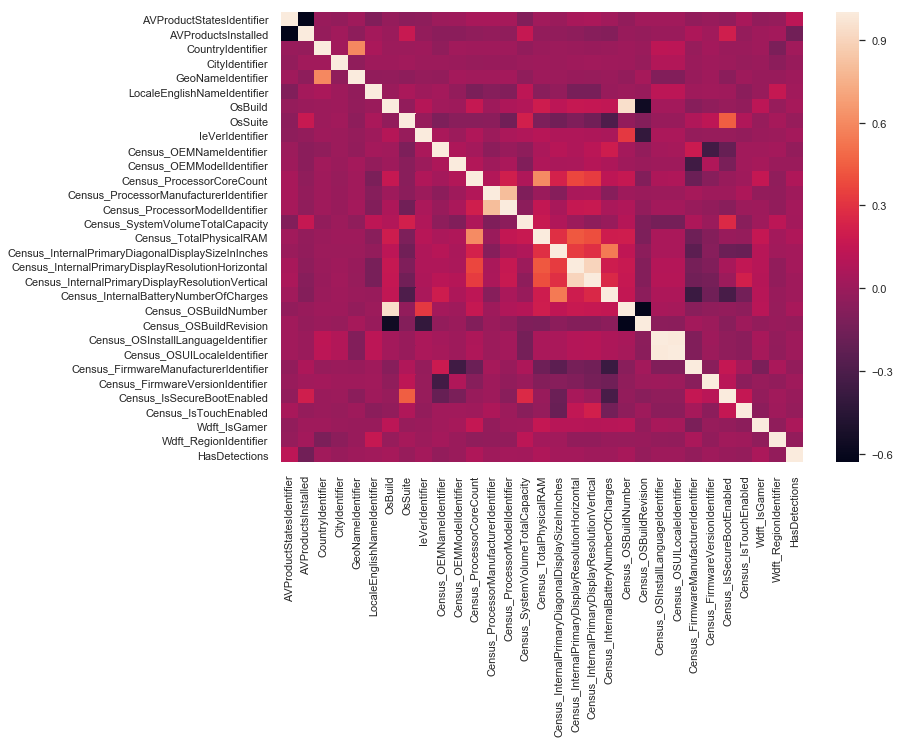

In [20]:
# Let's do this on a smaller sample

df_sample = df.sample(10000)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df_sample.corr());

In [21]:
to_drop = ['AVProductsInstalled', 'Census_OSBuildRevision', 'Census_OSBuildNumber', 'Census_FirmwareManufacturerIdentifier',
          'Census_OEMNameIdentifier']

df.drop(to_drop, axis=1, inplace=True)

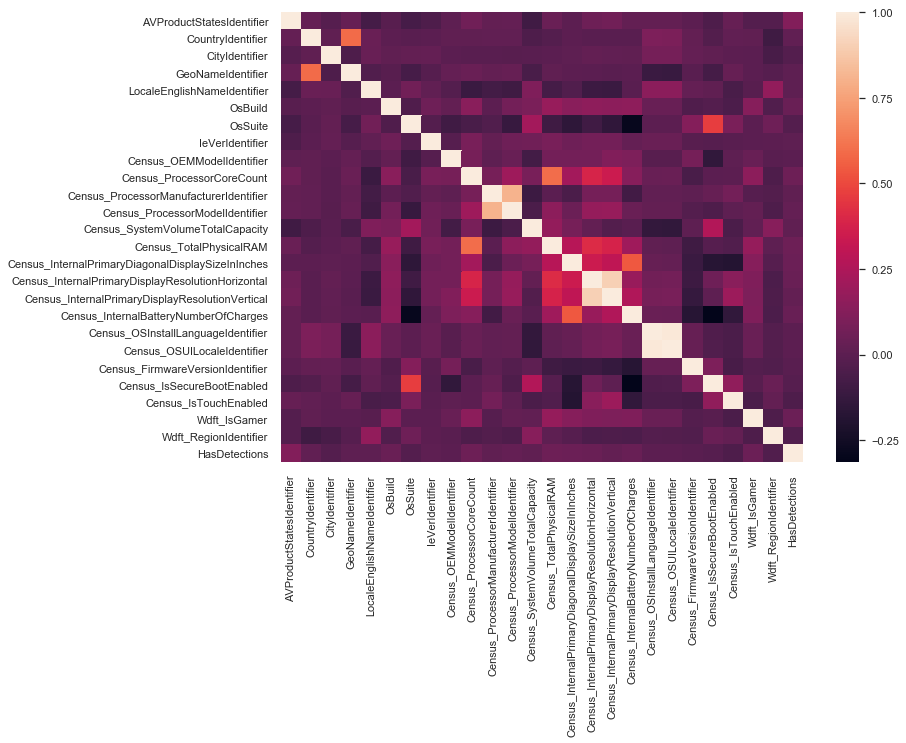

In [22]:
# Second Round

df_sample = df.sample(10000)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df_sample.corr());

In [23]:
to_drop = ['GeoNameIdentifier', 'Census_ProcessorModelIdentifier',
           'Census_InternalPrimaryDisplayResolutionVertical',
           'Census_OSUILocaleIdentifier', 'Census_TotalPhysicalRAM']

df.drop(to_drop, axis=1, inplace=True)

### Transform Continuous Columns

#### Let's define some helper functions

In [26]:
def report_ranges(df):
    out = []
    for col in df.columns:
        if not df[col].dtype.name in ['category', 'bool', 'object']:
            out.append((df[col].max() - df[col].min(), col))
    out.sort(key=lambda x: x[0], reverse=True)
    return out

def discretize(df, col_name, labels, new_name, quantiles=True):
    bins = len(labels)
    if quantiles:
        df[new_name] = pd.qcut(df[col_name], bins, labels=labels, duplicates='drop')
#         df.drop(col_name, axis=1, inplace=True)
    else:
        df[new_name] = pd.cut(df[col_name], bins)
    print(df[new_name].value_counts())
        
    
def log_transform(df, col_name):
    df[col_name] = np.log1p(df[col_name])
    sns.distplot(df[col_name])

In [31]:
ranges = report_ranges(df)

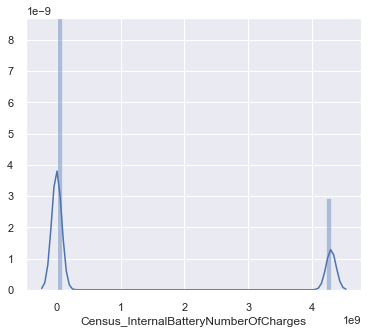

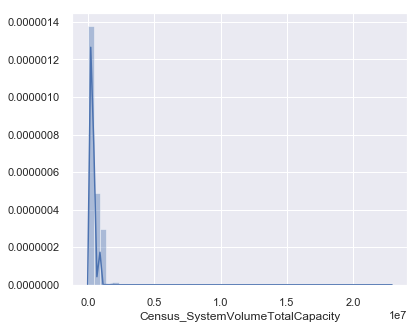

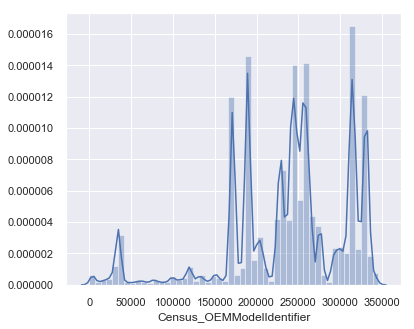

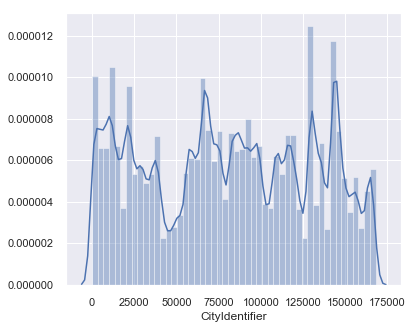

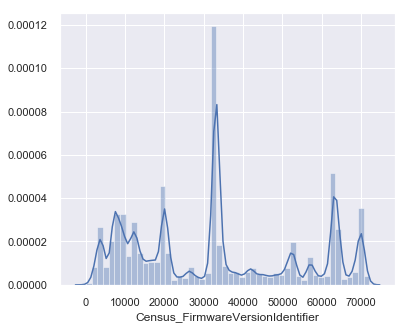

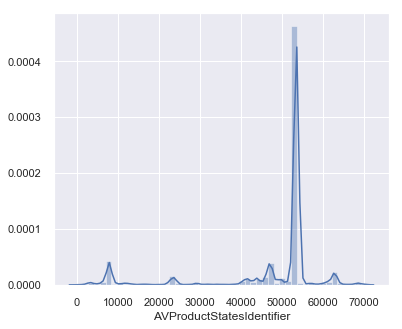

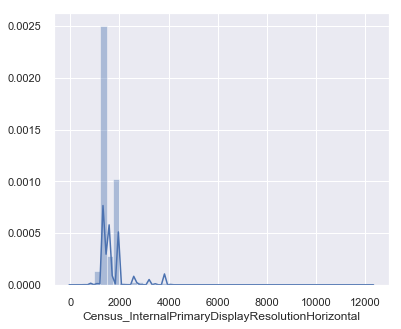

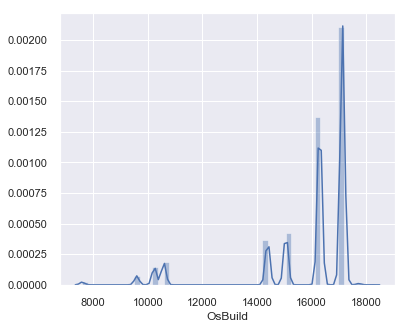

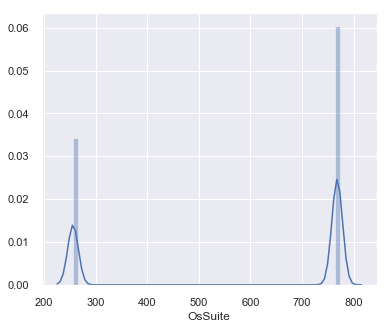

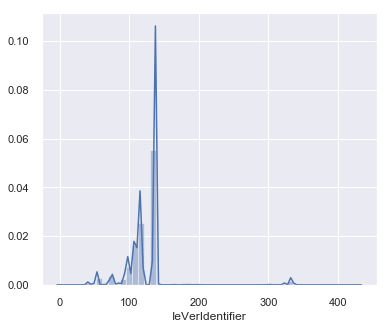

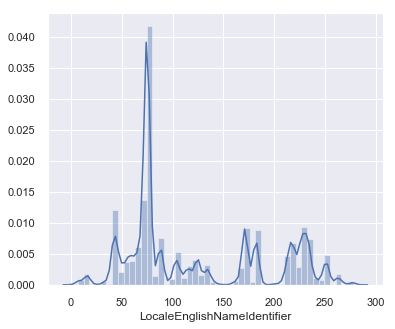

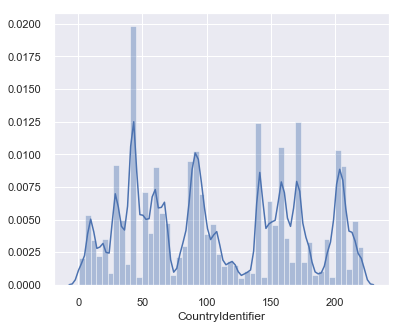

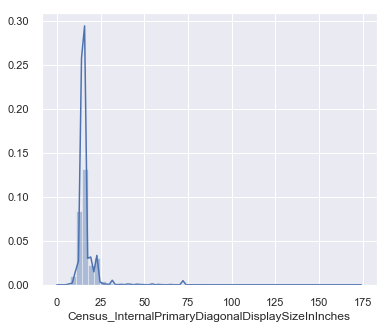

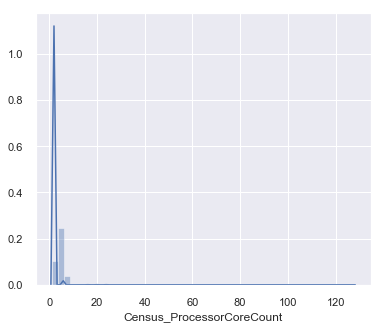

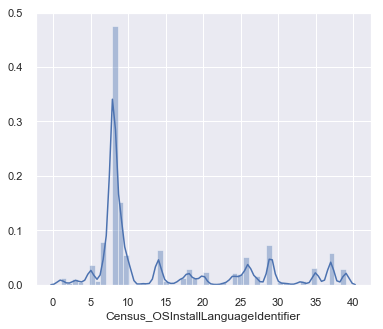

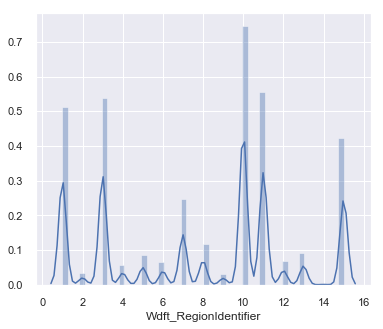

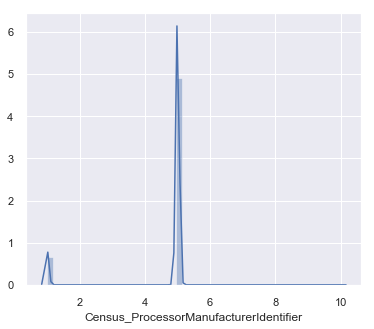

In [38]:
for col in ranges:
    col_name = col[1]
    sns.set(rc={'figure.figsize':(6,5)})
    sns.distplot(df[col_name])
    plt.show();

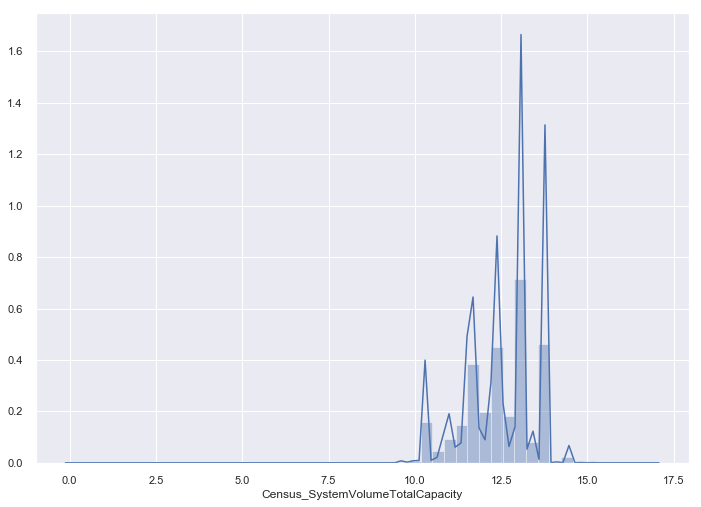

In [39]:
log_transform(df, 'Census_SystemVolumeTotalCapacity')

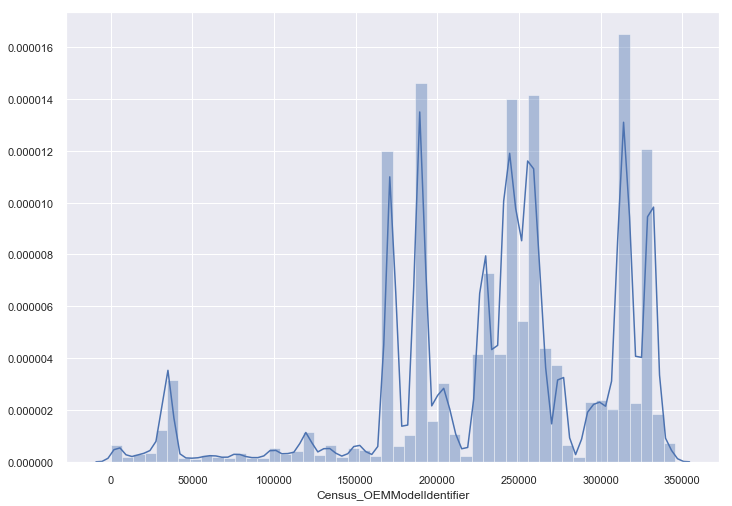

In [41]:
sns.distplot(df['Census_OEMModelIdentifier']);

# TODO: Fix

In [46]:
discretize(df, 'Census_OEMModelIdentifier', ['1', '2', '3', '4', '5'], 'Model_cat')

4    1543059
1    1540839
3    1539651
2    1538580
5    1536285
Name: Model_cat, dtype: int64


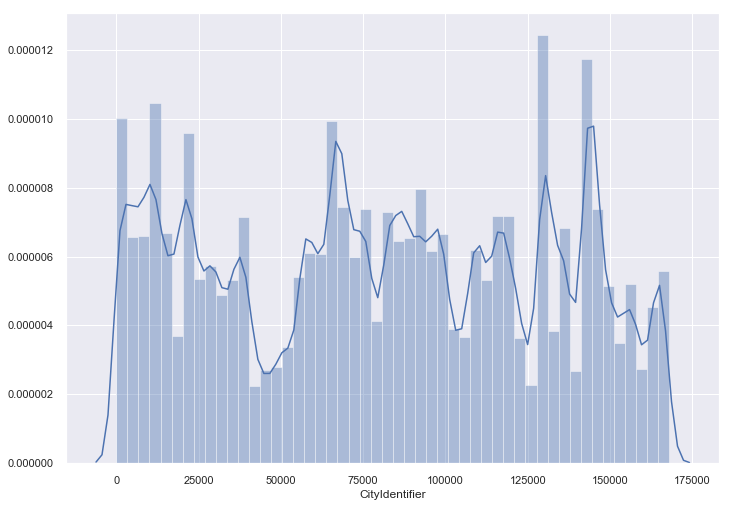

In [48]:
sns.distplot(df['CityIdentifier']);

In [49]:
# This looks categorical, and we don't know anything about the feature, so we will drop it.

df.drop('CityIdentifier', axis=1, inplace=True)

In [50]:
report_ranges(df)

[(72095.0, 'Census_FirmwareVersionIdentifier'),
 (70495.0, 'AVProductStatesIdentifier'),
 (12289.0, 'Census_InternalPrimaryDisplayResolutionHorizontal'),
 (10644, 'OsBuild'),
 (528, 'OsSuite'),
 (428.0, 'IeVerIdentifier'),
 (282, 'LocaleEnglishNameIdentifier'),
 (221, 'CountryIdentifier'),
 (172.8, 'Census_InternalPrimaryDiagonalDisplaySizeInInches'),
 (127.0, 'Census_ProcessorCoreCount'),
 (38.0, 'Census_OSInstallLanguageIdentifier'),
 (16.9463, 'Census_SystemVolumeTotalCapacity'),
 (14.0, 'Wdft_RegionIdentifier'),
 (9.0, 'Census_ProcessorManufacturerIdentifier')]

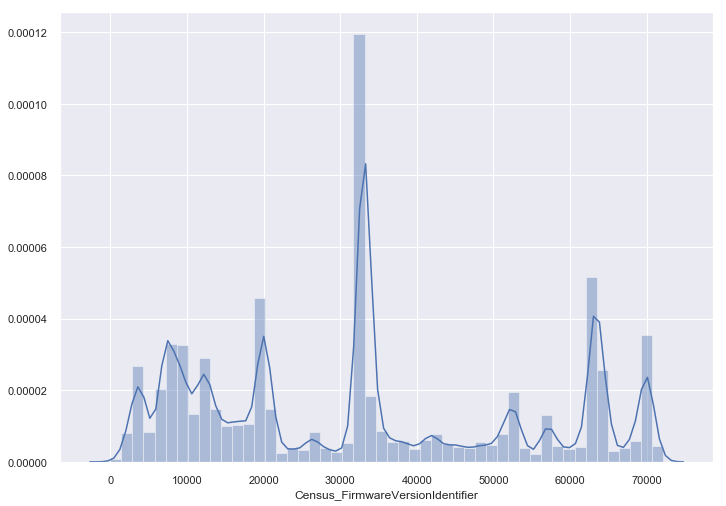

In [51]:
sns.distplot(df['Census_FirmwareVersionIdentifier']);

In [53]:
discretize(df, 'Census_FirmwareVersionIdentifier', ['1', '2', '3'], 'Firmware_cat')

1    2578403
3    2566066
2    2553945
Name: Firmware_cat, dtype: int64


In [54]:
report_ranges(df)

[(70495.0, 'AVProductStatesIdentifier'),
 (12289.0, 'Census_InternalPrimaryDisplayResolutionHorizontal'),
 (10644, 'OsBuild'),
 (528, 'OsSuite'),
 (428.0, 'IeVerIdentifier'),
 (282, 'LocaleEnglishNameIdentifier'),
 (221, 'CountryIdentifier'),
 (172.8, 'Census_InternalPrimaryDiagonalDisplaySizeInInches'),
 (127.0, 'Census_ProcessorCoreCount'),
 (38.0, 'Census_OSInstallLanguageIdentifier'),
 (16.9463, 'Census_SystemVolumeTotalCapacity'),
 (14.0, 'Wdft_RegionIdentifier'),
 (9.0, 'Census_ProcessorManufacturerIdentifier')]

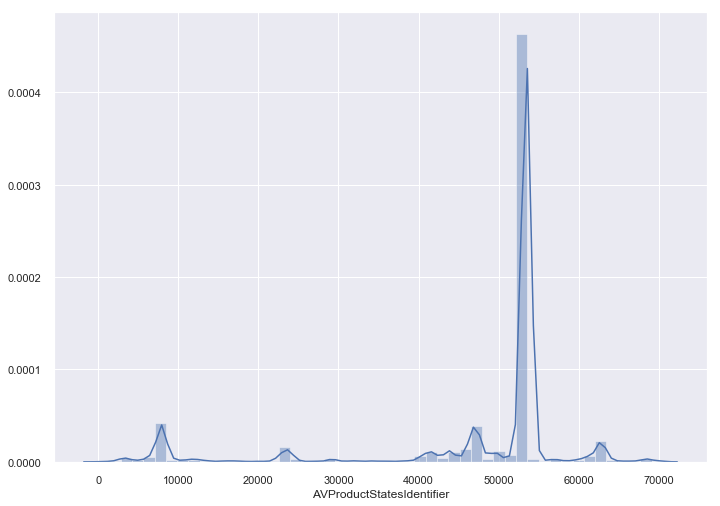

In [55]:
sns.distplot(df['AVProductStatesIdentifier']);

In [ ]:
sns.distplot(df[df['AVProductStatesIdentifier'] > 52000]);

### Get a smaller sample

In [18]:
df_sample = df.sample(10000)

In [19]:
df_sample.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightsDisabled,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
6533954,d943dab6d05091d432ab941df13ed546,win8defender,1.1.15000.2,4.9.10586.1106,1.271.999.0,False,7.0,False,53300.0,2.0,1.0,True,43,35688.0,53.0,42,windows10,x64,10.0.0.0,10586,768,th2,10586.1176.amd64fre.th2_release_sec.170913-1848,Home,True,False,False,74.0,True,1.0,Detachable,Windows.Desktop,2668.0,171209.0,4.0,5.0,3145.0,122104.0,SSD,61441.0,False,4096.0,Notebook,12.0,2160.0,1440.0,Mobile,0.0,10.0.10586.1176,amd64,th2_release_sec,10586,1176,CoreCountrySpecific,CORE_COUNTRYSPECIFIC,Reset,37.0,158,UNKNOWN,False,IS_GENUINE,OEM:DM,False,Retail,628.0,27823.0,True,False,True,True,False,False,7.0,False
3526869,75497165fe37e0d3ee89ab6df2ce66e9,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1796.0,False,7.0,False,53447.0,1.0,1.0,True,149,139601.0,181.0,56,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,True,False,False,137.0,True,1.0,Notebook,Windows.Desktop,2206.0,239746.0,4.0,5.0,2462.0,238475.0,HDD,237235.0,False,4096.0,Notebook,14.0,1366.0,768.0,Mobile,0.0,10.0.16299.309,amd64,rs3_release,16299,309,Professional,PROFESSIONAL,Upgrade,24.0,109,Notify,False,IS_GENUINE,Retail,False,Retail,500.0,14313.0,False,False,False,True,False,False,15.0,True
5278819,af9b15d0bed8aa1b84fb9c7de7678a42,win8defender,1.1.15200.1,4.12.16299.15,1.273.1809.0,False,7.0,False,53447.0,1.0,1.0,True,43,163573.0,53.0,42,windows10,x64,10.0.0.0,16299,256,rs3,16299.15.amd64fre.rs3_release.170928-1534,Pro,True,False,False,135.0,True,1.0,Notebook,Windows.Desktop,2668.0,80143.0,4.0,5.0,3063.0,244198.0,SSD,62921.0,False,8192.0,Notebook,14.0,1920.0,1080.0,Mobile,0.0,10.0.16299.98,amd64,rs3_release,16299,98,Professional,PROFESSIONAL,Other,37.0,158,UNKNOWN,False,IS_GENUINE,OEM:DM,False,Retail,628.0,47773.0,True,False,False,False,False,False,7.0,True
3357217,6fa47b94534d33b341475c7ecd00dd6b,win8defender,1.1.15100.1,4.18.1806.18062,1.273.371.0,False,7.0,False,60535.0,2.0,1.0,True,141,163380.0,167.0,227,windows10,x64,10.0.0.0,16299,768,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,Home,False,False,False,117.0,True,1.0,Notebook,Windows.Desktop,2668.0,171142.0,2.0,5.0,1998.0,953869.0,HDD,907782.0,False,4096.0,Notebook,13.9,1366.0,768.0,Mobile,0.0,10.0.16299.431,amd64,rs3_release_svc_escrow,16299,431,CoreSingleLanguage,CORE_SINGLELANGUAGE,Upgrade,9.0,34,Notify,False,IS_GENUINE,OEM:DM,False,Retail,628.0,26163.0,True,False,False,False,False,False,1

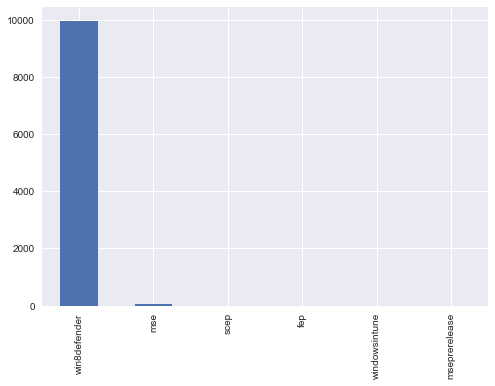

In [48]:
df_sample['ProductName'].value_counts().plot(kind='bar')

### Hand Select Columns to Drop

In [ ]:
# (df.groupby(['SmartScreen'])['HasDetections'].sum() / df.groupby(['SmartScreen']).HasDetections.count())['Block']

# def group_column(df, attribute, identifier, num_samples=1000, percentage=0.2):
#     for k in series.keys():
#         cond1 = df.groupby([attribute]).HasDetections.count() > num_samples
#         cond2 = (df.groupby(['SmartScreen']).HasDetections.sum() / df.groupby(['SmartScreen']).HasDetections.count())['Block']